In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Вспомогательная функция сигмоиды
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
# Функция потерь и градиента
def log_loss(w, X, y):
    m = X.shape[0]
    y_hat = sigmoid(np.dot(X, w))
    loss = - (1 / m) * np.sum(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15))
    grad = (1 / m) * np.dot(X.T, (y_hat - y))
    return loss, grad

In [4]:
# Обучение модели
def optimize(w, X, y, n_iterations, eta):
    losses = []
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad
        losses.append(loss)
    return w, losses

In [5]:
# Предсказание классов
def predict(w, X, b=0.5):
    y_hat = sigmoid(np.dot(X, w))
    y_predicted = (y_hat > b).astype(int)
    return y_predicted

In [6]:
# Генерация данных
np.random.seed(42)
m, n = 100, 2
X = np.random.randn(m, n)
w_true = np.array([0.5, -0.5])
y = sigmoid(np.dot(X, w_true) + np.random.randn(m) * 0.1)
y = (y > 0.5).astype(int)
X = np.hstack((np.ones((m, 1)), X))  # добавляем bias
w_init = np.zeros(n + 1)

In [7]:
# Обучение
eta = 0.1
n_iterations = 1000
w_opt, losses = optimize(w_init, X, y, n_iterations, eta)

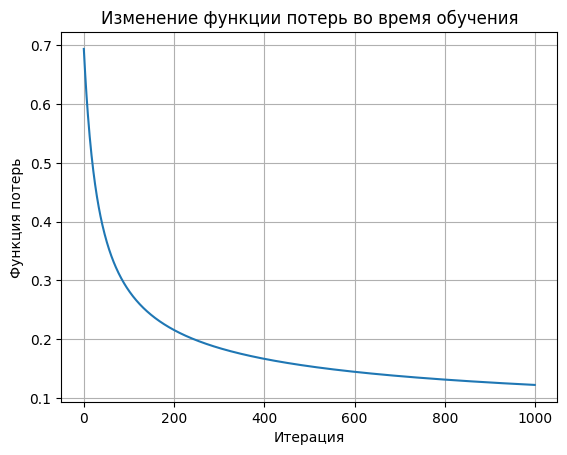

In [8]:
# Визуализация
plt.plot(range(n_iterations), losses)
plt.xlabel('Итерация')
plt.ylabel('Функция потерь')
plt.title('Изменение функции потерь во время обучения')
plt.grid(True)
plt.show()

In [9]:
# Оценка качества
y_pred = predict(w_opt, X)
accuracy = np.mean(y_pred == y)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.97
